In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/hotel_bookings 2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43946 entries, 0 to 43945
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43946 non-null  object 
 1   is_canceled                     43945 non-null  float64
 2   lead_time                       43945 non-null  float64
 3   arrival_date_year               43945 non-null  float64
 4   arrival_date_month              43945 non-null  object 
 5   arrival_date_week_number        43945 non-null  float64
 6   arrival_date_day_of_month       43945 non-null  float64
 7   stays_in_weekend_nights         43945 non-null  float64
 8   stays_in_week_nights            43945 non-null  float64
 9   adults                          43945 non-null  float64
 10  children                        43941 non-null  float64
 11  babies                          43945 non-null  float64
 12  meal                            

In [4]:
df.shape

(43946, 32)

In [5]:
df.isnull().sum()

hotel                                 0
is_canceled                           1
lead_time                             1
arrival_date_year                     1
arrival_date_month                    1
arrival_date_week_number              1
arrival_date_day_of_month             1
stays_in_weekend_nights               1
stays_in_week_nights                  1
adults                                1
children                              5
babies                                1
meal                                  1
country                             465
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                              8640
company                           40665


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

<Axes: xlabel='arrival_date_year', ylabel='is_canceled'>

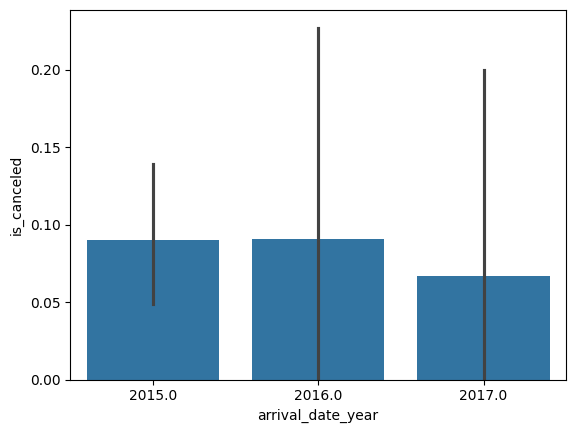

In [8]:
sns.barplot(x='arrival_date_year',y='is_canceled',data=df)

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

<ipython-input-10-8ed662810bf6>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])


In [11]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0.0,6.0,2015.0,October,42.0,11.0,2.0,0.0,2.0,...,No Deposit,240.0,113.0,0.0,Transient,82.0,1.0,1.0,Check-Out,2015-10-13
2697,Resort Hotel,0.0,24.0,2015.0,October,44.0,26.0,7.0,15.0,1.0,...,No Deposit,185.0,281.0,0.0,Transient-Party,52.2,0.0,0.0,Check-Out,2015-11-17


In [12]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,181,181,181,181,181,181,181,181,181,181,181
unique,2,12,4,15,6,3,5,9,3,4,3
top,Resort Hotel,November,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient-Party,Check-Out
freq,170,127,174,70,130,131,139,99,177,134,165


In [13]:
df.drop(['company','agent'], axis=1,inplace=True)

In [14]:
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['October' 'November' 'May' 'June' 'December' 'January' 'March' 'February'
 'April' 'July' 'August' 'September']
meal
['BB' 'HB' 'SC' 'FB']
country
['PRT' 'AUT' 'ESP' 'ITA' 'FRA' 'DEU' 'BEL' 'CZE' 'GBR' 'NLD' 'USA' 'MEX'
 'CHE' 'AUS' 'BGR']
market_segment
['Online TA' 'Corporate' 'Direct' 'Groups' 'Offline TA/TO' 'Complementary']
distribution_channel
['TA/TO' 'Corporate' 'Direct']
reserved_room_type
['E' 'A' 'D' 'H' 'C']
assigned_room_type
['E' 'G' 'A' 'F' 'D' 'C' 'I' 'B' 'H']
deposit_type
['No Deposit' 'Non Refund' 'Refundable']
customer_type
['Transient' 'Transient-Party' 'Group' 'Contract']
reservation_status
['Check-Out' 'Canceled' 'No-Show']


<Axes: xlabel='deposit_type', ylabel='adults'>

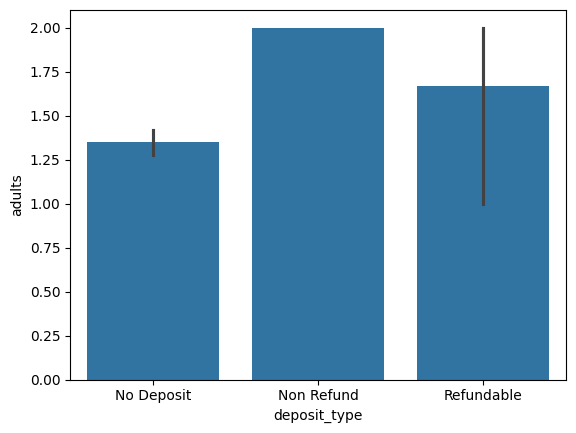

In [19]:
sns.barplot(x='deposit_type',y='adults',data=df)

In [20]:
df['Total_Meambers']=df['adults']+df['children']

In [30]:
df['Total_Meambers'].astype(int).inplace=True

In [31]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Meambers
2392,Resort Hotel,0.0,6.0,2015.0,October,42.0,11.0,2.0,0.0,2.0,...,1.0,No Deposit,0.0,Transient,82.0,1.0,1.0,Check-Out,2015-10-13,2.0
2697,Resort Hotel,0.0,24.0,2015.0,October,44.0,26.0,7.0,15.0,1.0,...,2.0,No Deposit,0.0,Transient-Party,52.2,0.0,0.0,Check-Out,2015-11-17,1.0


<Axes: xlabel='arrival_date_year', ylabel='Total_Meambers'>

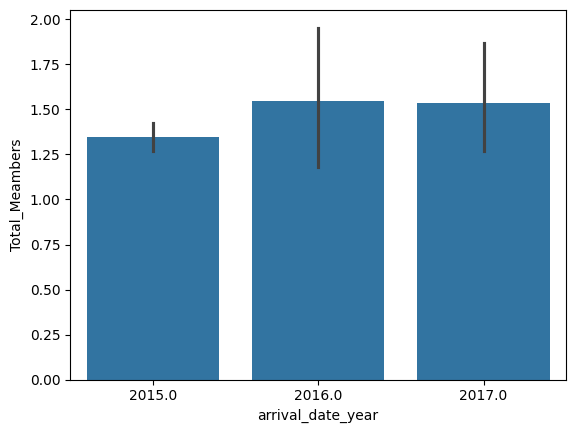

In [32]:
sns.barplot(x='arrival_date_year',y='Total_Meambers',data=df)

<Axes: xlabel='arrival_date_year', ylabel='Total_Meambers'>

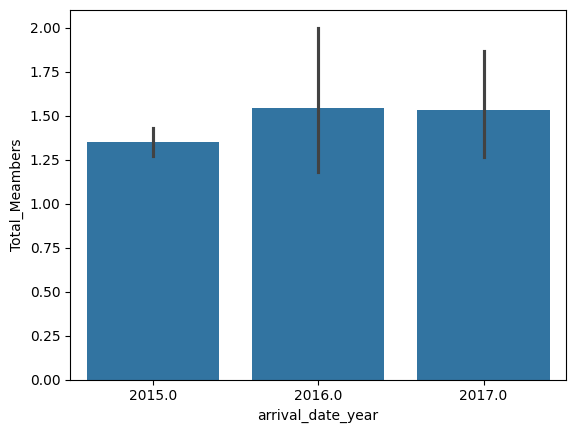

In [33]:
sns.barplot(x='arrival_date_year',y='Total_Meambers',data=df)

In [ ]:
df['Total_Meambers']=df['Total_Meambers',isin
                        ]